In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

<div class="alert alert-info">

<b>Программа семинара: </b>
    
Иерархический кластерный анализ. Кластер, расстояния между объектами, расстояния между кластерами. Алгоритм построения дендрограммы. Каменистая осыпь/локоть. Стандартизация данных. Типичные ошибки при подготовке данных. Интрепретация результатов

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
 <b> Разберемся с типами задач </b>
    
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
 <li><b>Регрессия</b> - задача о предсказывании конкретного значения, но основе заданных параметров.</li>
 <li><b>Кластеризация</b>  - задача об объединении объектов в группы по каким-то уникальным общим свойствам/на основе каких-то закономерностях данных.</li>

</ul>
</div>

# Кластеризация. Кластер

<h2>Постановка задачи кластеризации</h2>
<p style="align: center;"><img align=center id="1" src="https://sun9-56.userapi.com/impg/jvoMdfrv_AoGzyknSStx57s89-G4gJKUQuCVqA/OI0-CP5BEck.jpg?size=653x508&quality=96&proxy=1&sign=bd8a0e2aab0a9db737b825d2492ed28a&type=album"  width=900></p>

<p>Имеется множество $X$ - множество, где $n$ - кол-во объектов, $k$ - признаков. Задача состоит в том, чтобы отобразить множество  $X$  на множество $y$ - меток. Т.е. каждому объекту поставить в соответствие (пару) метку кластера так, чтобы <b>близкие</b> (в смысле расстояния) объекты лежали в одном кластере, а далекие - в разных. </p> Имеем отображение (функция расстояния) $\rho : X \times X \rightarrow [0,\infty) $
$$X^{n\times k} \rightarrow y^{n \times 1}$$
</p>
Заметим, что в данном виде математически задача некорректна, в ней много неоднозначности, и в каждом конкретном случае условия для поставновки задачи могут быть разные.
Рассмотрим разные типы класстеризации. 
<div class="alert alert-info">
<h3>Типы кластеризации</h3>
<ul>
    <li><b>Жесткая</b> кластеризация (один объект может принадлежать только одному классу)</li>
<li><b>Мягкая</b> кластеризация (один объект может принадлежать нескольким классам или не принадлежать совсем)</li>
    <li><b>Иерархическая</b> кластеризация (объект внутри кластера 2.1 находится внутри кластера 2)</li>
</ul></div

<img src='./images/kinds_clustering.PNG' >

# Иерархическая кластеризация

<p id="3">Рассмотрим следующий алгоритм кластеризации - иерархическую кластеризацию. Суть метода заключается в следующем: изначально предполагается, что каждый объект принадлежит какому-то своему кластеру, а затем максимально близкие точки сливаются в "объединения", и это продолжается до тех пор пока не образуется один большой гиперкластер. Иллюстрация метода в виде дерева:  </p>
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/1024px-Hierarchical_clustering_simple_diagram.svg.png"  width=800></p></div>

# Дендрограмма

<img src='./images/cluster_dendo.gif'  width=800>

## Построение дендограммы

<img src='./images/cluster_exam_2.PNG'  width=2000>

Построим данный метод (его дендрограмму) на примере.

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

Метод `linkage` строит матрицу связей. Ему передается на вход матрица  X и метод определения близости между кластерами. На выходе получаем объект связей - <b>дендрограмму</b>.

In [10]:
# импортируем второй датасет с двумя четко выраженными кластерами
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3)

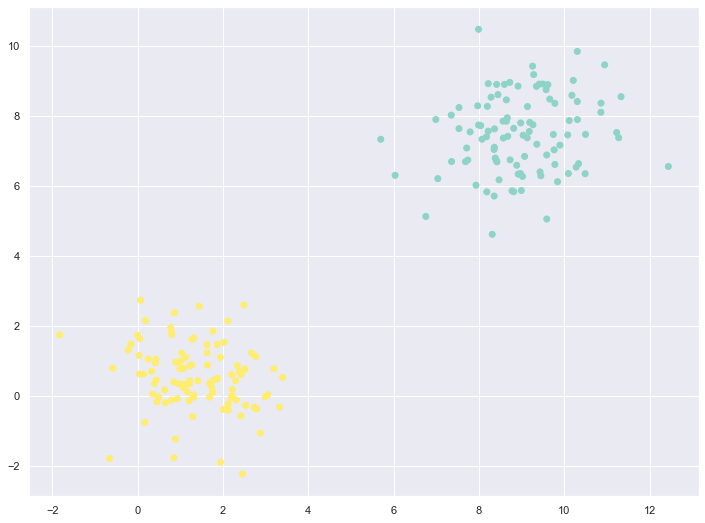

In [63]:
plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap ='Set3')
plt.show()

In [12]:
Z = linkage(X_blobs, 'ward') # здесь используем расстояния по Уорду, о нем позднее

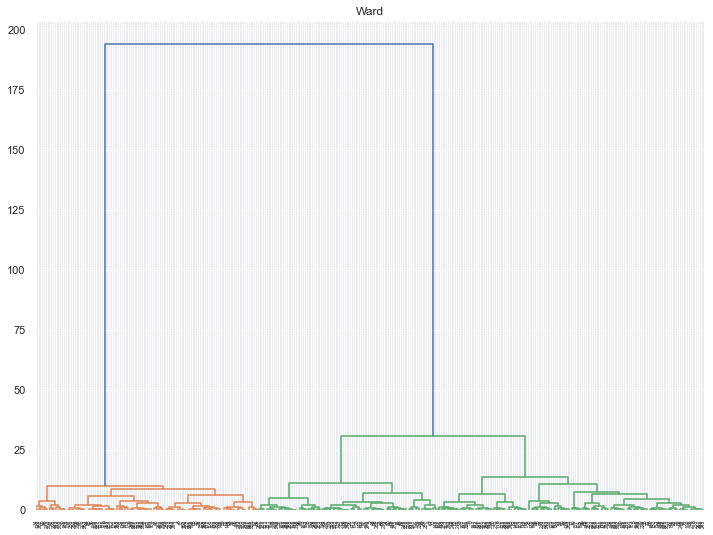

In [13]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z)
plt.show()

# Проверим себя

<img src='./images/clu_test.PNG'  width=2000>

# Расстояния между объектами

<div class="alert alert-info">

**<i>Как считать меру близости между объектам?</i>** (меру подобия). Для количественных (интервальных или метрических) переменных:
* **Евклидово расстояние** – наименьшее расстояние между х и у. В двух- или трёхмерном случае – это прямая, соединяющая данные точки.
* **Квадрат евклидового расстояния** – устанавливается по умолчанию.
* **Корреляция Пирсона** – применима, если кластеризация наблюдений осуществляется только на основании двух переменных.
* **Блок (Block)** – это дистанционная мера, называемая также расстоянием Манхэттена или Хемминга, определяется суммой абсолютных разностей пар значений.
* **Косинусное рассрояние**, **расстояние Минковского, Чебышева** и многие другие ...

# Расстояния между кластерами

<div class="alert alert-info">
    
**<i>Как считаем расстояние между кластерами?</i>**
<p> Расстояние между кластерами базируется на расстоянии между двумя точками, которое может быть выбрано как в норме L1, L2, cos и т.д.
Если известно расстояние между двумя точками, то есть несколько самых интуитивных и эффективных подходов. 
<ol>
    <li>Расстояние ближнего соседа</li>
<li>Расстояние дальнего соседа</li>
<li>Групповое расстояние</li>
<li>Расстояние между центрами</li>
<li>Расстояние Уорда</li></ol>
</p></div>

<b><p>1. Метод ближнего соседа.</p></b><b></b>
<p>Берем все попарные расстояния между всеми точками в кластерах и считаем из них минимум. Получаем оценку насколько близки два кластера друг к другу.</p>
$$R^{б}(W,S) = \min\limits_{w, s}\rho(w,s)$$
<p style="align: center;"><img align=center src="https://sun9-36.userapi.com/impg/bcjD2Z4qGgPwghDryeZbgSHc4bfFgqug5uK8sw/x3tC2C7sXuQ.jpg?size=988x225&quality=96&proxy=1&sign=8f51501f7e5f6bd7b443cd6308272fb9&type=album"  width=900></p></div>
<b><p>2. Метод дальнего соседа.</p></b>
<p>Аналогично берем все попарные расстояния между всеми точками в кластерах и считаем из них максимум. Получаем оценку насколько сильно разнятся самые дальние объекты кластеров.</p>
$$R^{д}(W,S) = \max\limits_{w, s}\rho(w,s)$$
<p style="align: center;"><img align=center src="https://sun9-8.userapi.com/impg/1KP_j94TIXxVfGs1bIevY0iYsporwmPeSAJL-Q/_5lW18OUn0M.jpg?size=1024x215&quality=96&proxy=1&sign=11ac311bf0487115787897dfa666fa98&type=album"  width=900></p></div>
<b><p>3. Метод группового среднего.</p></b>
<p>Суммируем все попарные расстояния между точками и делим на кол-во этих попарных расстояний. Получаем в итоге "усредненное" расстояние между точками.</p>
$$R^{г}(W,S) = \frac{1}{|W|\cdot|S|}\sum\limits_{w}\sum\limits_{s}\rho(w,s)$$
<b><p>4. Расстояние между центрами кластеров.</p></b>
<p>Если удается найти центры масс кластеров, то можно найти расстояние между ними. </p>
$$R^{ц}(W,S) = \rho^2 \left( \sum\limits_{w}\frac{w}{|W|},\sum\limits_{s}\frac{s}{|S|}\right)$$
<b><p>5. Расстояние Уорда.</p></b>
<p>Берем расстояние между центрами кластеров и довзвешиваем его на среднее гармоническое. Это самый универсальный метод и наиболее эффективный во многих задачах.</p>
$$R^{у}(W,S) = \frac{|W|\cdot|S|}{|W|+|S|}\rho^2 \left( \sum\limits_{w}\frac{w}{|W|},\sum\limits_{s}\frac{s}{|S|}\right)$$

In [21]:
# Рассмотрим эти расстояния на практике

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

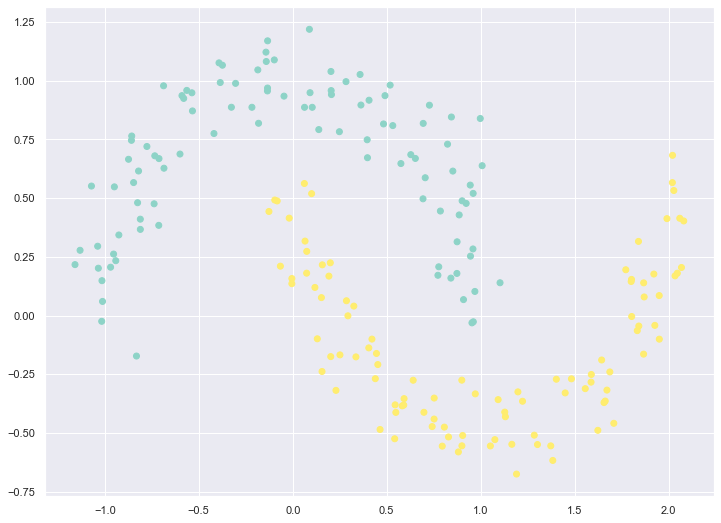

In [62]:
# подгружаем один из набиолее популярных для обучения датасетов из полумесяцев
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.1) #задаем 200 объектов

plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap ='Set3')
plt.show()

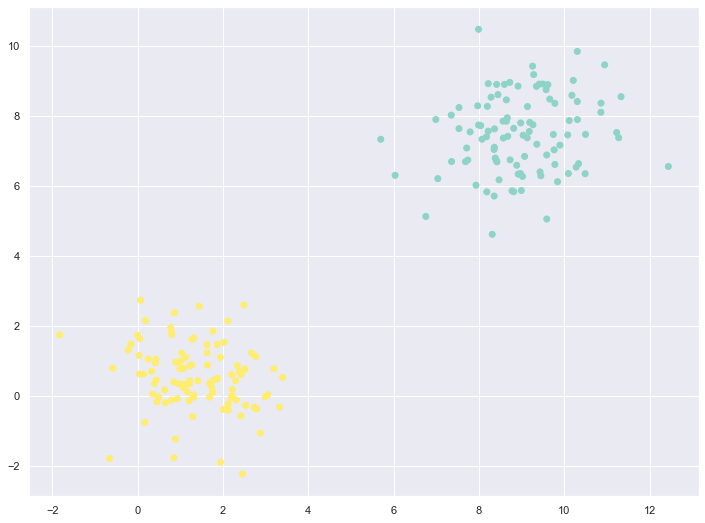

In [61]:
# импортируем второй датасет с двумя четко выраженными кластерами
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=200, centers=2)

plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap ='Set3')
plt.show()

In [19]:
Z_blobs = linkage(X_blobs, 'ward') # считаем методом Уорда для блобов и полумесяцев
Z_moons = linkage(X_moons, 'ward')


Z_moons_s = linkage(X_moons, 'single') # считаем методом single = минимальное расстояние между точками кластеров

<div class="alert alert-info">
Получаем дендрограмму для блобов, видим 2 очевидных кластера.

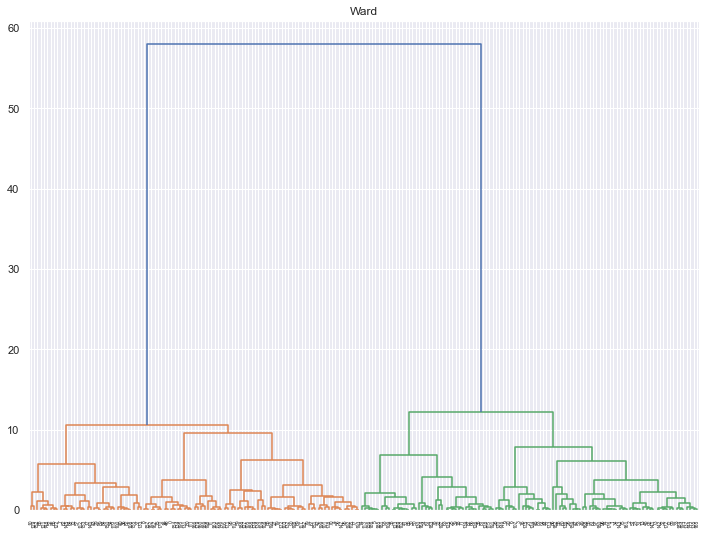

In [20]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z_blobs)
plt.show()

<div class="alert alert-info">
Аналогично получаем дендрограмму для полумесяцев, видим что картина уже не такая очевидная. 2 кластера.

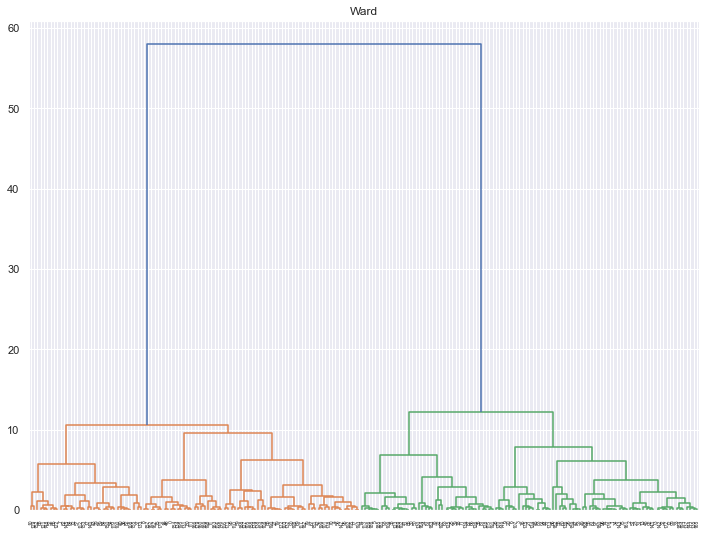

In [21]:
plt.figure(figsize=(12,9))
plt.title('Ward')
dendrogram(Z_blobs)
plt.show()

<div class="alert alert-info">
То же самое для полумесяцев, но методом single. Получаем еще более неочевидную картину.

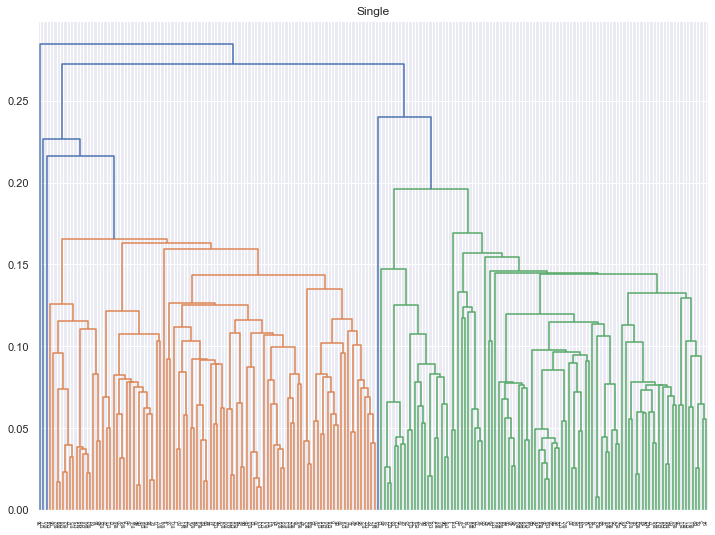

In [22]:
plt.figure(figsize=(12,9))
plt.title('Single')
dendrogram(Z_moons_s)
plt.show()

# Количество кластеров

<div class="alert alert-info">
    
**<i>Как же выбрать правильное кол-во кластеров?</i>**

<p>Используем локтевой метод (или по-простому "метод локтя"). Перебираем от 1 до N кластеров, считаем внутрикластерное расстояние и в какой-то момент  качество перестанет быстро улучшаться - это и есть <b>оптимальное</b> количество кластеров.</p></div>
<p style="align: center;"><img align=center src="https://ranalytics.github.io/data-mining/101-Partitioning-Algos_files/figure-html/fig-10-1-1.png"  width=900></p></div>

Этот же способ еще называют - **критерий каменистой осыпи** - он состоит в поиске точки, где убывание собственных значений замедляется наиболее сильно. 
Справа от этой точки находится, по-видимому, только "факторная осыпь"; "осыпь" - это геологический термин для обломков, которые скапливаются в нижней части каменистого склона.
Таким образом, число выделенных факторов не должно превышать количество факторов слева от этой точки. 

* Необходимо руководствоваться практическими и теоретическими
соображениями. Исходя из цели исследования, например, может быть
необходимо три кластера.
* * Когда мера расстояния между двумя кластерами увеличивается
скачкообразно, процесс объединения в новые кластеры необходимо
остановить. Иначе будут объединены кластеры, находящиеся на большом
расстоянии друг от друга.
* * Оптимальным считается число кластеров равное разности количества
наблюдений и количества шагов, после которого коэффициент
увеличивается скачкообразно.
* Размеры кластеров должны быть значимыми.

# Стандартизация данных. Типичные ошибки при подготовке данных.

- Избыток переменных. Отбор переменных
- Соизмеримость данных. Прошлая лекция **(StandartScaling / MinMaxScaling / RobustScaling)**


Иначе данные могу вводить модели в тупик

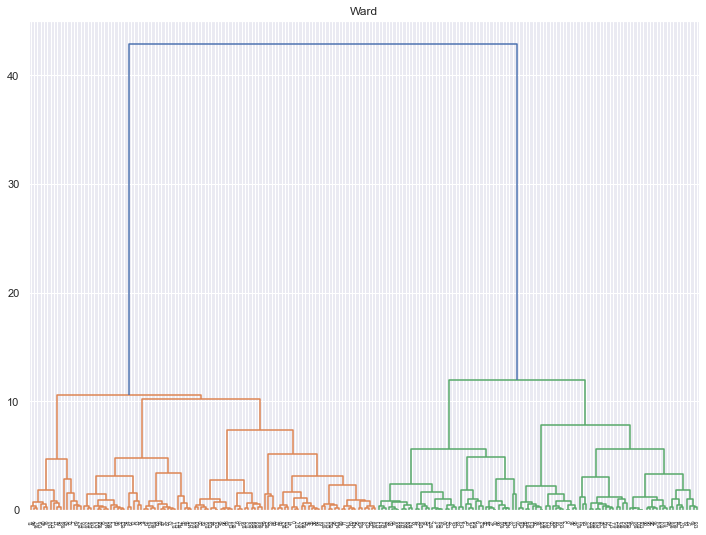

# Интрепретация результатов

<p style="align: center;"><img align=center id="1" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Classes_of_ERVs.svg/1200px-Classes_of_ERVs.svg.png"  width=900></p>


<p style="align: center;"><img align=center id="1" src="https://i.ovalengineering.com/img/scientific-reports/57/pan-cancer-subtyping-2d-map-shows-substructures-that-are-driven-specific-combinations-molecular-characteristics_1.jpg"  width=900></p>


( а ) Проекция 4434 образцов больных раком с использованием MEREDITH. Каждая точка, будь то квадрат (мужчина), точка (женщина) или плюс (пол без метки), представляет собой образец, окрашенный на основе метки типа рака (всего 19 типов рака). Кластеризация образцов рака иллюстрируется 18 разноцветными картами плотности. ( б ) Тепловая карта, изображающая кластеризацию образцов рака по сравнению с типами рака. Звездочка указывает на значительное перепредставление образцов от определенного типа рака в кластере, тогда как цветные квадраты показывают процентное содержание образцов рака в конкретном кластере. Красное число обозначает образцы КС.

источник: https://ru.ovalengineering.com/pan-cancer-subtyping-2d-map-shows-substructures-that-are-driven-specific-combinations-molecular-characteristics-846590

Кластеризация невсегда дает осмысленный результат

<img src='./images/cluster_mistake_my.jpg' >

# Дополнительно:
* https://habr.com/ru/post/527334/

# Семинар № 7 - Алгоритмы кластеризации

<div class="alert alert-info">

<b>Программа семинара: </b>
 
Метод **к-средних**. Датчики случайных чисел, зерно датчика. Визуализация алгоритма метода **к-средних**. Методы определения числа кластеров. Библиотека `NbClust`. 
Каменистая осыпь/локоть. Многомерное шкалирование для визуализации кластеров

<p style="align: center;"><img id="2" align=center src="https://blog.bismart.com/hubfs/Imported_Blog_Media/ClassificationAndClustering/Clustering%26clasification-Animales.gif"  width=900></p>    

Метод k-средних</h3>
<p style="align: center;"><img id="2" align=center src="https://datascience.eu/wp-content/uploads/2019/12/Screenshot-2020-10-17-at-13.30.08-978x652.png"  width=900></p>

<p>Метод k-средних (англ. K-means) заключается в том, чтобы минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.
$$\sum\limits_{i=0}^n \min\limits_{\mu_j} (||x_i - \mu_j||)^2$$
    Для начала нужно задать начальные значения центров кластеров. Затем <b>считать до тех пор, пока</b> центры смещаются: присвоить наблюдениям номер кластера с <b>ближашим</b> к ним центром, передвинуть центры кластеров к среднему значению координат объектов кластера.</p>

Посмотрим как он работает в движении

<p style="align: center;"><img id="2" align=center src="https://uploads.toptal.io/blog/image/92528/toptal-blog-image-1463672901961-c86610183bb2ba67f979c421f6748893.gif"  width=900></p>

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров `k`. Сам алгоритм таков, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

Проблемы алгоритма **k-means**:
* **Необходимо заранее знать количество кластеров**. Можно оценить с помощью правила локтя/осыпи.
* Алгоритм очень чувствителен к выбору начальных центров кластеров. Классический вариант подразумевает случайный выбор класторов, что часто приводит погрешности.
* Не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.

 <div class="alert alert-info"><h3>Ограничения</h3>
 Алгоритм может выдавать контринтуитивные результаты:
 <ol>
    <li>Если указано не то число кластеров.</li>
<li>Кластеры не выпуклые и близко расположены.</li>
    <li>Разная дисперсия близких кластеров.</li>
</ol>
<p style="align: center;"><img align=center src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png"  width=900></p></div>

Рассмотрим метод на практике.

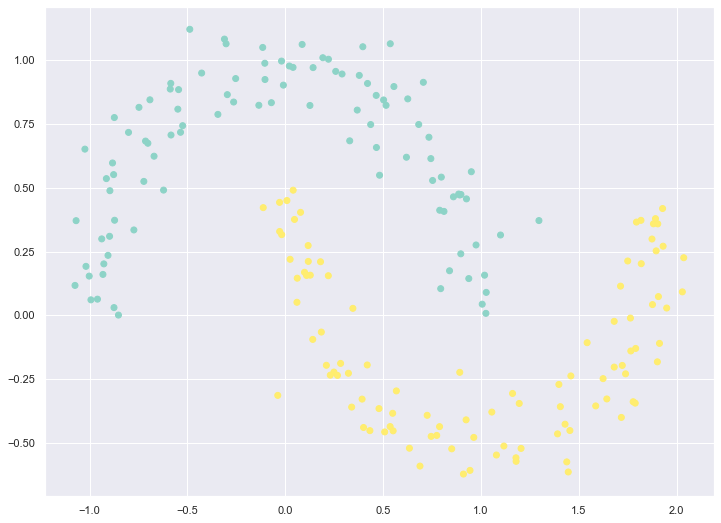

In [2]:
# подгружаем один из набиолее популярных для обучения датасетов из полумесяцев
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.1) #задаем 200 объектов

plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap ='Set3')
plt.show()

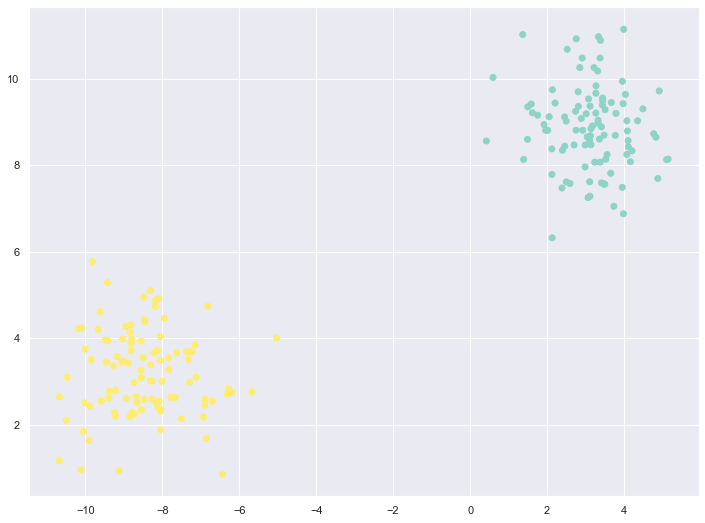

In [31]:
# импортируем второй датасет с двумя четко выраженными кластерами
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=200, centers=2)

plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap ='Set3')
plt.show()

<p>Реализуем свой метод K-means на 100 эпох следующим образом:</p>

In [32]:
from tqdm import tqdm 


def distance(point1, point2): # функция расстояния
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1] - point2[1])**2)

def MyKMeans(X, n_clusters, as_generator=False, n_epochs = 100):
    centroids = X[np.random.choice(list(range(len(X))), n_clusters)] # случайные выбираем точки для центров
#     n_epochs = 100 # кол-во эпох
    
    for _ in tqdm(range(n_epochs)): 
        #1. Cчитаем расстояния до кластеров
        belonging = []
        for sample in X:
            distances = []
            for center in centroids:
                distances.append(distance(sample, center))
            belonging.append(distances)
                
        #2. Определяем принадлежность кластерам
        belonging = np.array(belonging)
        belonging = np.argmin(belonging, axis=1) # позиция минимума
        
        #3. Перерасчитываем центры
        new_centroids = []
        for c in range(n_clusters):
            points = X[belonging==c]
            new_centroids.append(points.mean(axis=0))
        centroids = np.array(new_centroids)
        
        if as_generator:
            yield belonging, centroids # возвращаем генератор
    yield belonging, centroids
    

In [29]:
y_pred, centers = next(MyKMeans(X_blobs, 2, n_epochs=10)) # передаем 2 кластера

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 323.44it/s]


Итого имеем кластеризацию на два кластера c правильными центрами:

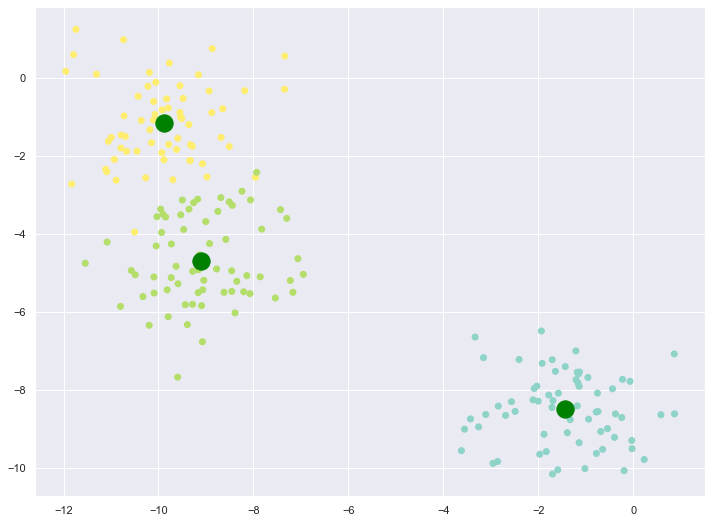

In [30]:
plt.figure(figsize=(12,9))
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs, cmap ='Set3')
plt.scatter(centers[:,0], centers[:,1], c='green', s=300, cmap ='Set3')
plt.show()

То же самое для полумесяцев

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 286.49it/s]


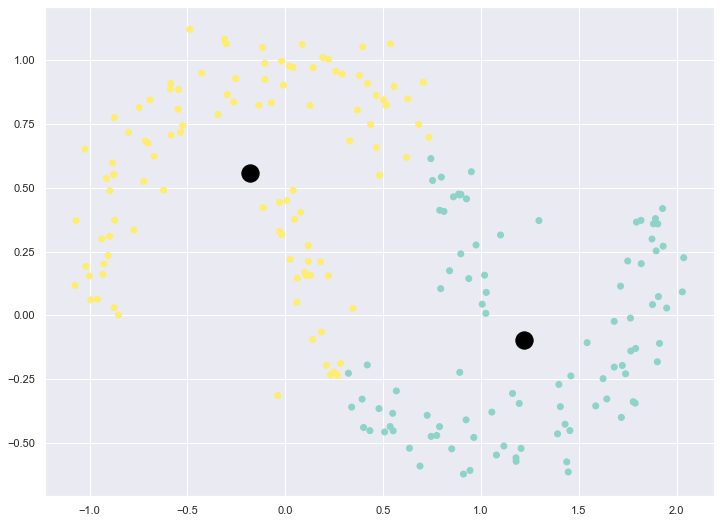

In [25]:
y_pred_moons, centers_moons = next(MyKMeans(X_moons, 2, n_epochs=10))
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_pred_moons, cmap ='Set3')
plt.scatter(centers_moons[:,0], centers_moons[:,1], c='black', s=300, cmap ='Set3')
plt.show()

Сделаем неправильное кол-во кластеров для полумесяцев. K-means будет также работать исправно.

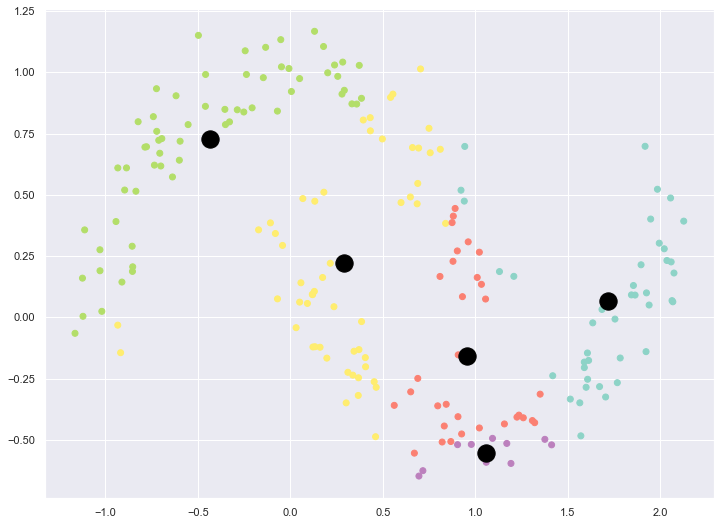

In [60]:
moons_gen = MyKMeans(X_moons, 5, True)
y_pred, centers = next(moons_gen)
plt.figure(figsize=(12,9))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_pred, cmap ='Set3')
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, cmap ='Set3')
plt.show()

<div class="alert alert-info"><h4><i>Как же выбрать правильное кол-во кластеров?</i></h4>
<p>Используем локтевой метод (или по-простому "метод локтя"). Перебираем от 1 до N кластеров, считаем внутрикластерное расстояние и в какой-то момент  качество перестанет быстро улучшаться - это и есть <b>оптимальное</b> количество кластеров.</p></div>
<p style="align: center;"><img align=center src="https://ranalytics.github.io/data-mining/101-Partitioning-Algos_files/figure-html/fig-10-1-1.png"  width=900></p></div>



<p style="align: center;"><img align=center src="https://arogozhnikov.github.io/images/opera/post/clustering-kmeans-smiley.gif"  width=900></p></div>


<div class="alert alert-info"><h3>Метрики качества кластеризации</h3>
<p id="6">Все популярные метрики качества делятся на два типа. Если реальные классы известны, то ARI (Adjusted Rand Index). Если неизвестны - Silhouette. </p>
<h4>Adjusted Rand Index</h4>
Основную идею можно прочитать на <a href="https://en.wikipedia.org/wiki/Rand_index/">википедии</a>.
<p>В данной метрике у нас есть $y_{true}$ - вектор меток реальных классов. $y_{pred}$ - то, что мы предсказали в результате кластеризации. $ARI \in
[0,1]$, где 0 - случайное разбиение кластеров, 1 - точное соответствие. При этом метрике не важны названия кластеров, т. е. по сути данная метрика  - есть аналог accuracy.</p>
<h4>Silhouette (силуэт)</h4>
<p>Эта метрика работает, если первоначально нет знания правильных классов. Суть заключается в оценке, насколько сильно один объект сидит внутри своего кластера и далеко от ближайшего соседа:
$$s = \frac{b-a}{max(a,b)},      S=mean(s)$$
где a - среднее расстояние до объектов внутри кластера, b - среднее расстояние до объектов ближайшего кластера, а среднее значение по всем объектам - силуэт кластеризации.</p>
Для понимания того, насколько они отражают реальную картину (см. рис.)</div>
<p style="align: center;"><img align=center src="https://sun9-32.userapi.com/impg/F6lWlqPv_mwvtrm38RjQmDbdacCzB6g9pfBvfw/aoJZQNhor70.jpg?size=1225x493&quality=96&proxy=1&sign=64bad287913e4c8014c27f4509354b82&type=album"  width=900></p>

# Есть и другие методы класстеризации - DBSCAN

<p style="align: center;"><img align=center src="https://arogozhnikov.github.io/images/opera/post/clustering-dbscan-smiley.gif"  width=900></p></div>





<p style="align: center;"><img align=center src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png"  width=900></p></div>

# Методов еще больше, чем вам кажется!

<p style="align: center;"><img align=center src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10044-021-00981-1/MediaObjects/10044_2021_981_Fig12_HTML.png"  width=900></p></div>

В проблеме кластеризации `Silhouette` проанализируйте расстояние между кластерами, используемое для изучения результатов кластеризации. Значение Силуэт измеряет, насколько близко точки в одном классе сравниваются с точками в разных классах. График Силуэт визуализирует эту меру, которая дает возможность оценить количество классов.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


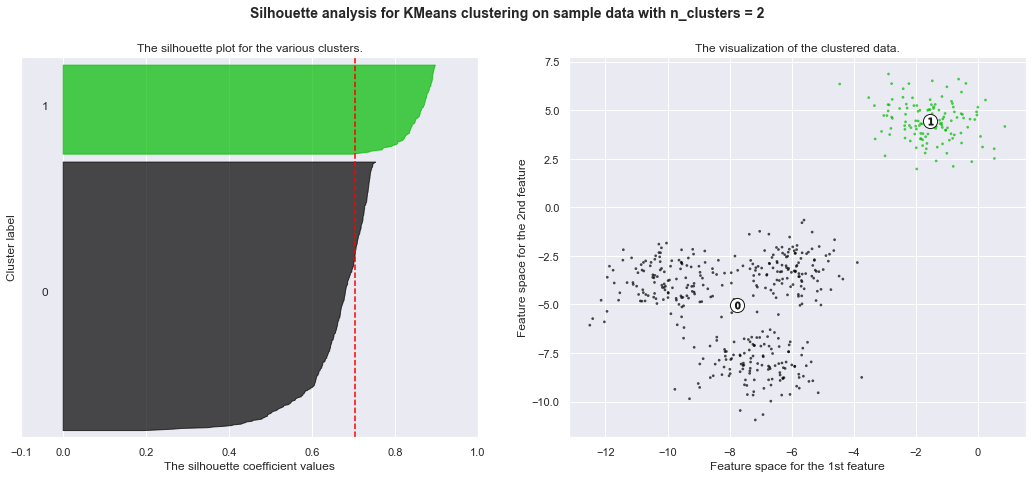

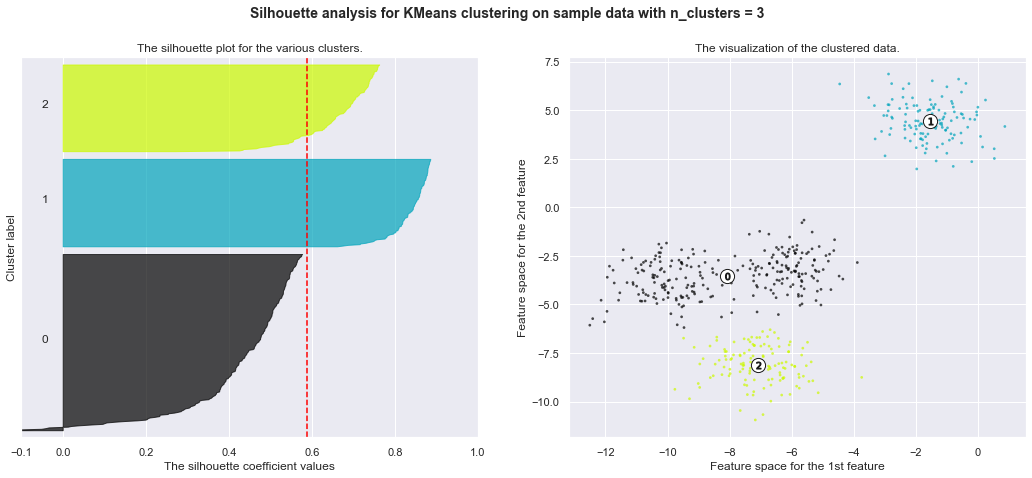

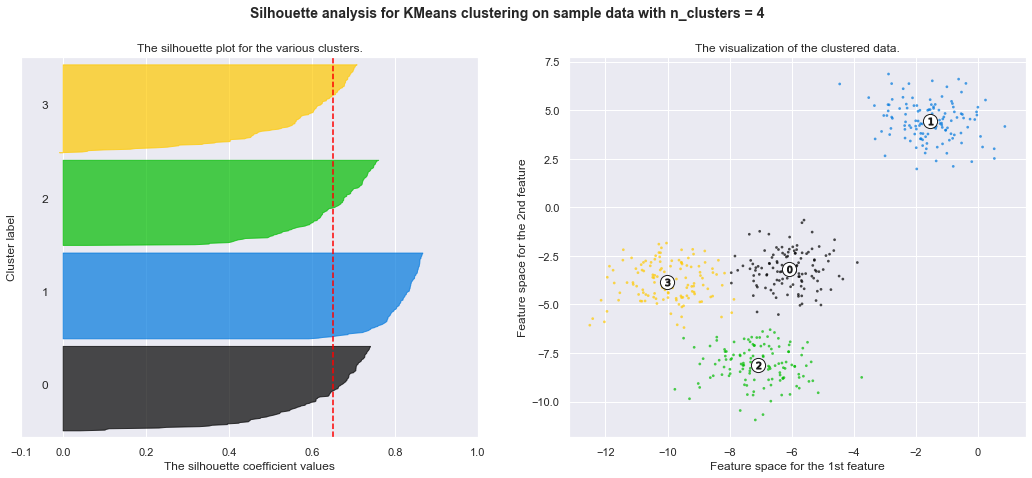

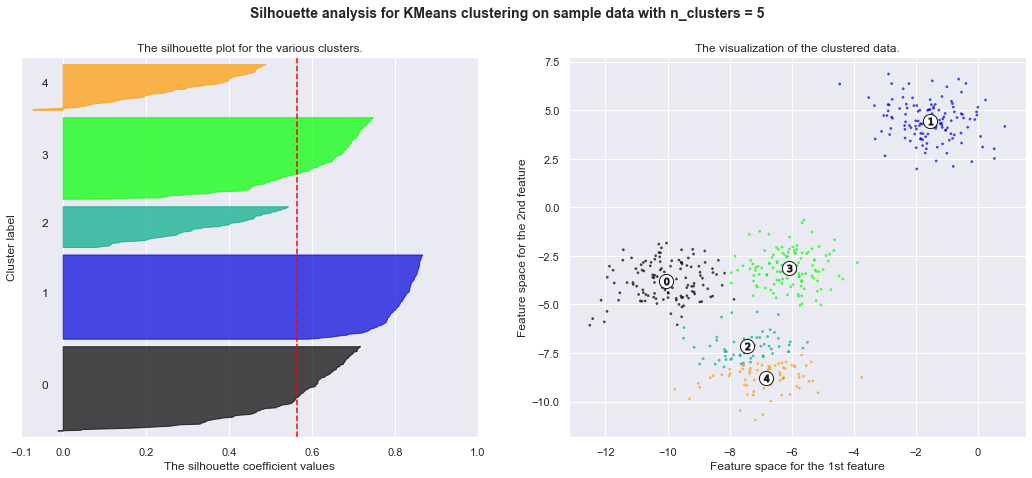

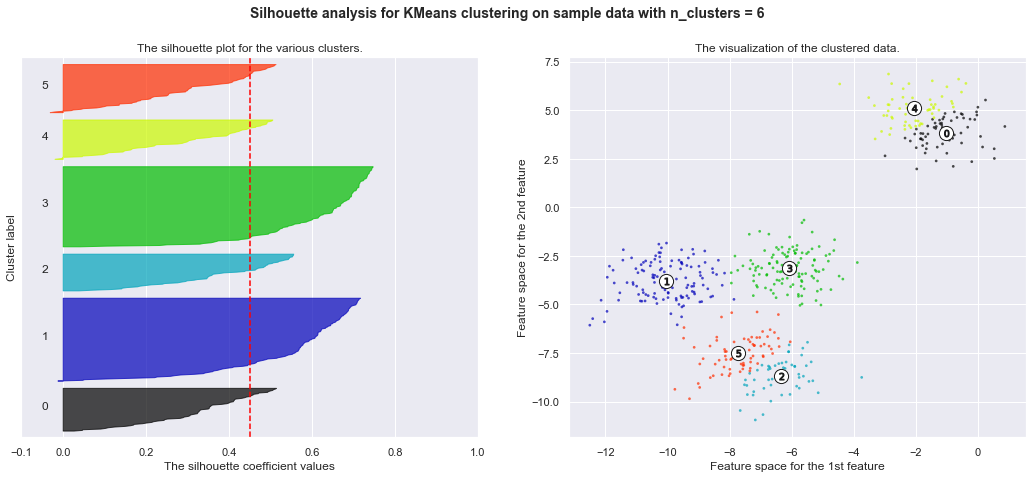

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Многомерное шкалирование

Многомерное шкалирование (МШ) позволяет представить большой
массив данных о различии объектов в наглядном, доступном для
интерпретации графическом виде.

Методы многомерного шкалирования (МШ) применяются на практике
для исследования сложных явлений и процессов, не поддающихся
непосредственному описанию или моделированию.


* если две точки на изображении удалены друг от друга, то между
соответствующими объектами имеется значительное расхождение
* если две точки на изображении расположены близко друг к другу, то
между соответствующими объектами наблюдается сходство


<h2>Summary</h2>
<ol><li>Кластеризация позволяет <b>находить структуру</b> в незамеченных данных, что может послужить <b>дополнительными признаками</b> обучения или являться <b>самодостаточной целью.</b></li>    
    <li>В задаче кластеризации <b>нет правильного решения.</b> Метрики качества служат лишь слабым приближением для создания новых алгоритмов или нахождения критерия остановки.</li>
    <li>Разные алгоритмы кластеризации принципиально <b>работают по-разному</b>, для конкретного набора данных необходимо выбирать наиболее подходящий.</li>



</ol>



<h3>Вопросы для самопроверки</h3>
<p><ol><li>При каких условиях актуален и эффективен алгоритм K-means? Какие ограничения можно наложить на использование этого алгоритма?</li><li>Какими методами можно посчитать расстояние между кластерами? В каких случаях они применимы? </li></ol></p>

<h3>Допольнительно</h3>

* https://habr.com/ru/company/ods/blog/325654/

<h1>Спасибо за внимание!</h1>